# Loading Libraries

In [204]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and Check Dataset 

In [174]:
# Laoding Dataset 
df = pd.read_csv('https://raw.githubusercontent.com/PeterLOVANAS/Titanic-machine-learning-project/main/datasets/Titanic_dataset_com.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [176]:
df.columns

Index(['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

In [177]:
df.describe()

,PassengerId,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Solving Missing Values

**Check total NaNs Values on each column**

In [178]:
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               1
age             264
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

___Totally we have 1310 rows and there is 1 row which is completely NaN with all features___

### Drop rows which are all NaNs

In [179]:
df.dropna(how = 'all', inplace = True)

### Check Percentage of missing values

In [180]:
def NansPercentage(col, dataframe):
    perc = dataframe[col].isnull().sum() / dataframe.shape[0]
    print(f"Missing Values Percentage of {col} Feature is {round(perc * 100,3)} %")

In [181]:
columns = ['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest']

for col in columns:
    NansPercentage(col, df)

Missing Values Percentage of PassengerId Feature is 0.0 %
Missing Values Percentage of pclass Feature is 0.0 %
Missing Values Percentage of survived Feature is 0.0 %
Missing Values Percentage of name Feature is 0.0 %
Missing Values Percentage of sex Feature is 0.0 %
Missing Values Percentage of age Feature is 20.092 %
Missing Values Percentage of sibsp Feature is 0.0 %
Missing Values Percentage of parch Feature is 0.0 %
Missing Values Percentage of ticket Feature is 0.0 %
Missing Values Percentage of fare Feature is 0.076 %
Missing Values Percentage of cabin Feature is 77.464 %
Missing Values Percentage of embarked Feature is 0.153 %
Missing Values Percentage of boat Feature is 62.872 %
Missing Values Percentage of body Feature is 90.756 %
Missing Values Percentage of home.dest Feature is 43.086 %


**It is clear that there are lots of NaNs on `cabin`, `boat`, `body`, `home.dest` features. So we can ignore and drop these features**

In [182]:
# function to show number of missing values of each feature
def getMissingValues(cols, dataframe):
        print(f"Number of Missing Values of {col} is {df[col].isnull().sum()}")

In [183]:
columns = ['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest']
for col in columns:
    getMissingValues(col, df)

Number of Missing Values of PassengerId is 0
Number of Missing Values of pclass is 0
Number of Missing Values of survived is 0
Number of Missing Values of name is 0
Number of Missing Values of sex is 0
Number of Missing Values of age is 263
Number of Missing Values of sibsp is 0
Number of Missing Values of parch is 0
Number of Missing Values of ticket is 0
Number of Missing Values of fare is 1
Number of Missing Values of cabin is 1014
Number of Missing Values of embarked is 2
Number of Missing Values of boat is 823
Number of Missing Values of body is 1188
Number of Missing Values of home.dest is 564


### Drop cabin, boat, body, home.dest Columns

In [184]:
df.drop(columns = ['cabin', 'boat', 'body', 'home.dest'], axis = 1, inplace = True)

In [185]:
# checking missing values percentage after droping columns with most NaNs
columns = ['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare',  'embarked']

for col in columns:
    NansPercentage(col, df)

Missing Values Percentage of PassengerId Feature is 0.0 %
Missing Values Percentage of pclass Feature is 0.0 %
Missing Values Percentage of survived Feature is 0.0 %
Missing Values Percentage of name Feature is 0.0 %
Missing Values Percentage of sex Feature is 0.0 %
Missing Values Percentage of age Feature is 20.092 %
Missing Values Percentage of sibsp Feature is 0.0 %
Missing Values Percentage of parch Feature is 0.0 %
Missing Values Percentage of ticket Feature is 0.0 %
Missing Values Percentage of fare Feature is 0.076 %
Missing Values Percentage of embarked Feature is 0.153 %


### Filling Missing Values

___For `fare`, `embarked` and `age` we will use mean to fill missing values___

In [186]:
df["fare"].fillna(value = df["fare"].mean(), inplace=True)
df["embarked"].fillna(df["embarked"].value_counts().idxmax(), inplace=True)
df["age"].fillna(value = df["age"].mean(), inplace=True)

In [187]:
columns = ['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare',  'embarked']
for col in columns:
    getMissingValues(col, df)

Number of Missing Values of PassengerId is 0
Number of Missing Values of pclass is 0
Number of Missing Values of survived is 0
Number of Missing Values of name is 0
Number of Missing Values of sex is 0
Number of Missing Values of age is 0
Number of Missing Values of sibsp is 0
Number of Missing Values of parch is 0
Number of Missing Values of ticket is 0
Number of Missing Values of fare is 0
Number of Missing Values of embarked is 0


***There are no Missing Values anymore***

# Data Visualization

### Survival Distribution

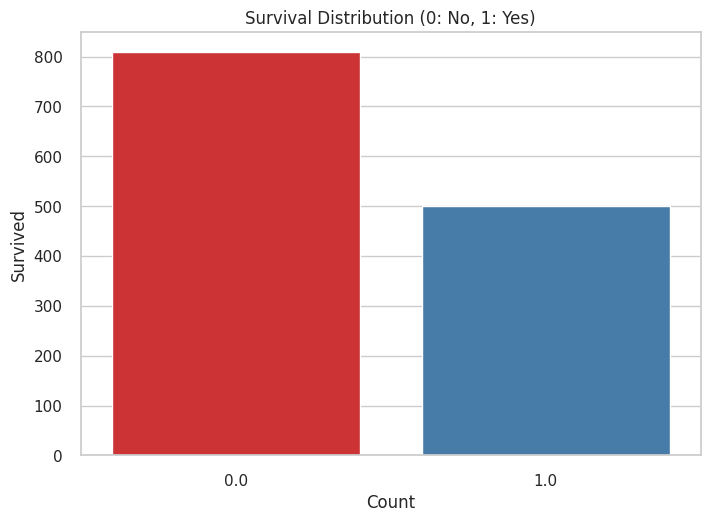

In [188]:
sns.set(style="whitegrid")
sns.countplot(x = 'survived', data = df, palette = 'Set1')    # creating coundplot
plt.title("Survival Distribution (0: No, 1: Yes)")            # set title for countplot
plt.ylabel("Survived")                                        # title of y-axis
plt.xlabel("Count")                                           # title of x-axis
plt.show()

### pclass Distribution

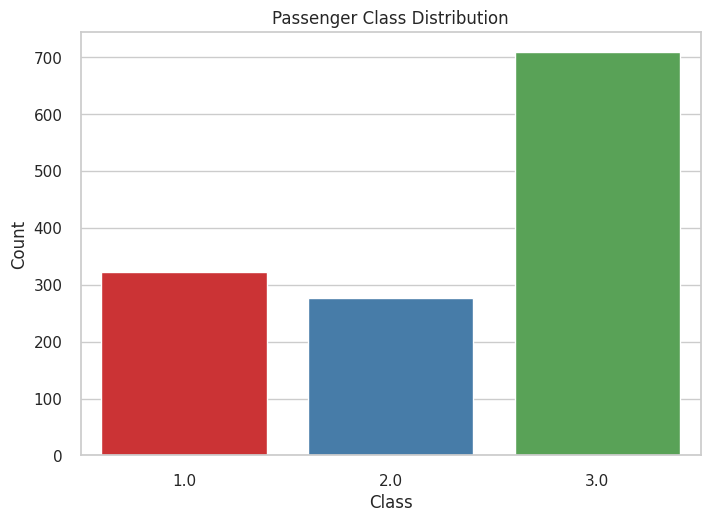

In [189]:
sns.set(style = 'whitegrid')
sns.countplot(x = 'pclass', data = df , palette = 'Set1')
plt.title("Passenger Class Distribution")
plt.ylabel('Count')
plt.xlabel("Class")
plt.show()

### Crrelation Matrix

[Text(0.5, 0, 'pclass'),
 Text(1.5, 0, 'survived'),
 Text(2.5, 0, 'sex_female'),
 Text(3.5, 0, 'sex_male'),
 Text(4.5, 0, 'age'),
 Text(5.5, 0, 'sibsp'),
 Text(6.5, 0, 'parch'),
 Text(7.5, 0, 'fare')]

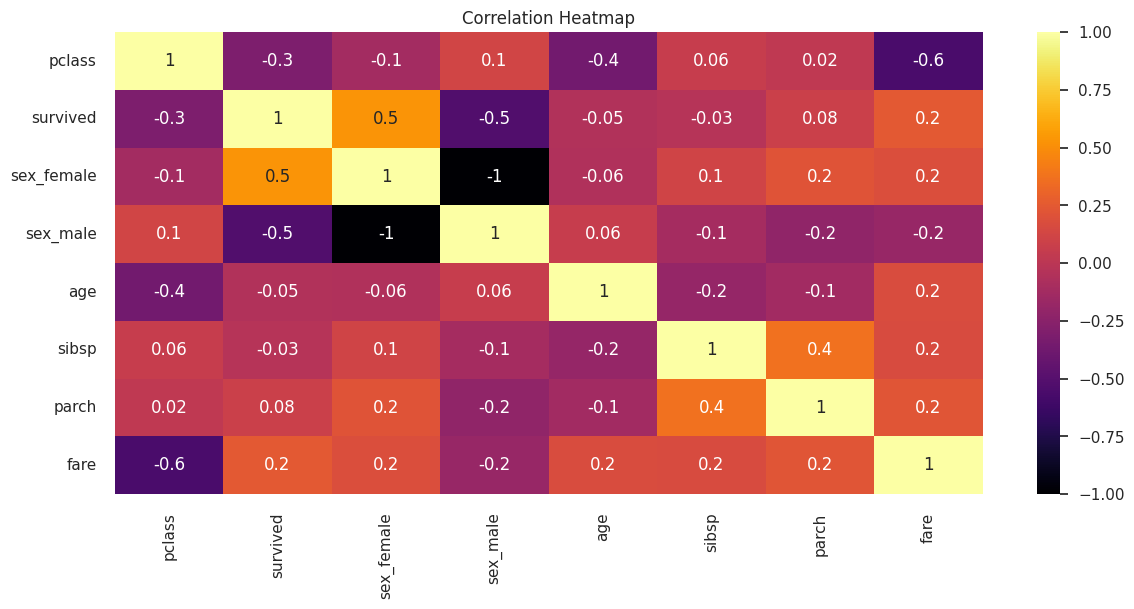

In [190]:
plt.figure(figsize = (14, 6))
ax = sns.heatmap(corr_df, annot = True, fmt=".1g", vmin = -1, vmax = 1, center = 0, cmap='inferno', linecolor='Black')
plt.title("Correlation Heatmap")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### `parch` Vs `survived` Correlation

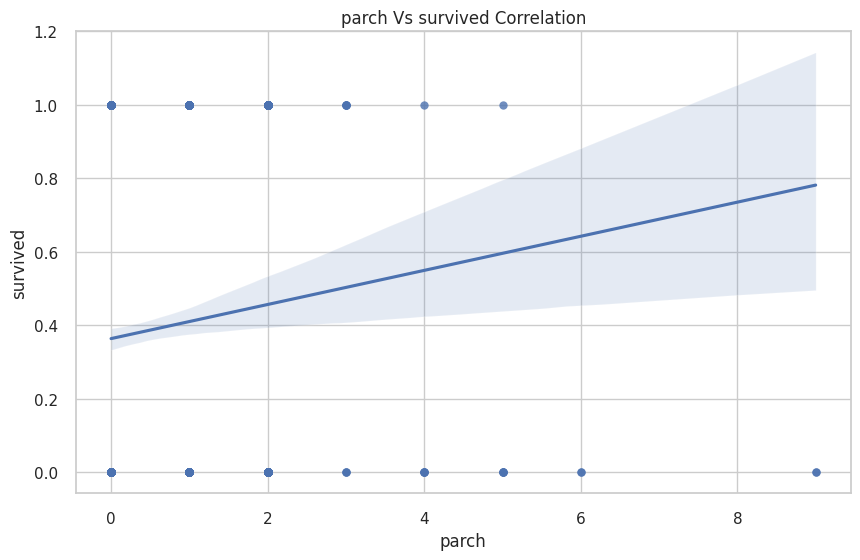

In [191]:
plt.figure(figsize = (10, 6))
sns.regplot(data = df, x = 'parch', y = 'survived', color = 'b')
plt.title("parch Vs survived Correlation")
plt.show()

### `sibsp` Vs `pclass` Correlation

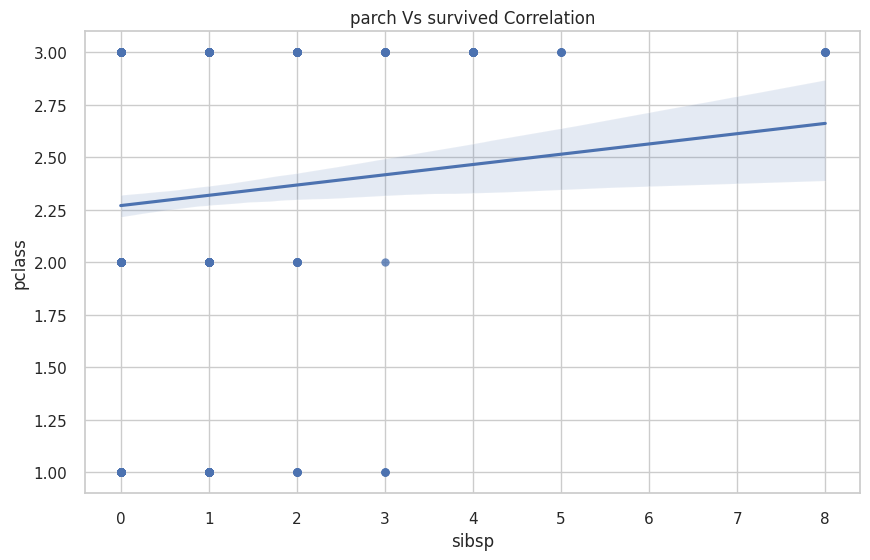

In [192]:
plt.figure(figsize = (10, 6))
sns.regplot(data = df, x = 'sibsp', y = 'pclass', color = 'b')
plt.title("parch Vs survived Correlation")
plt.show()

### Boxplot for Numeric Features

/tmp/ipykernel_46/2317695570.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


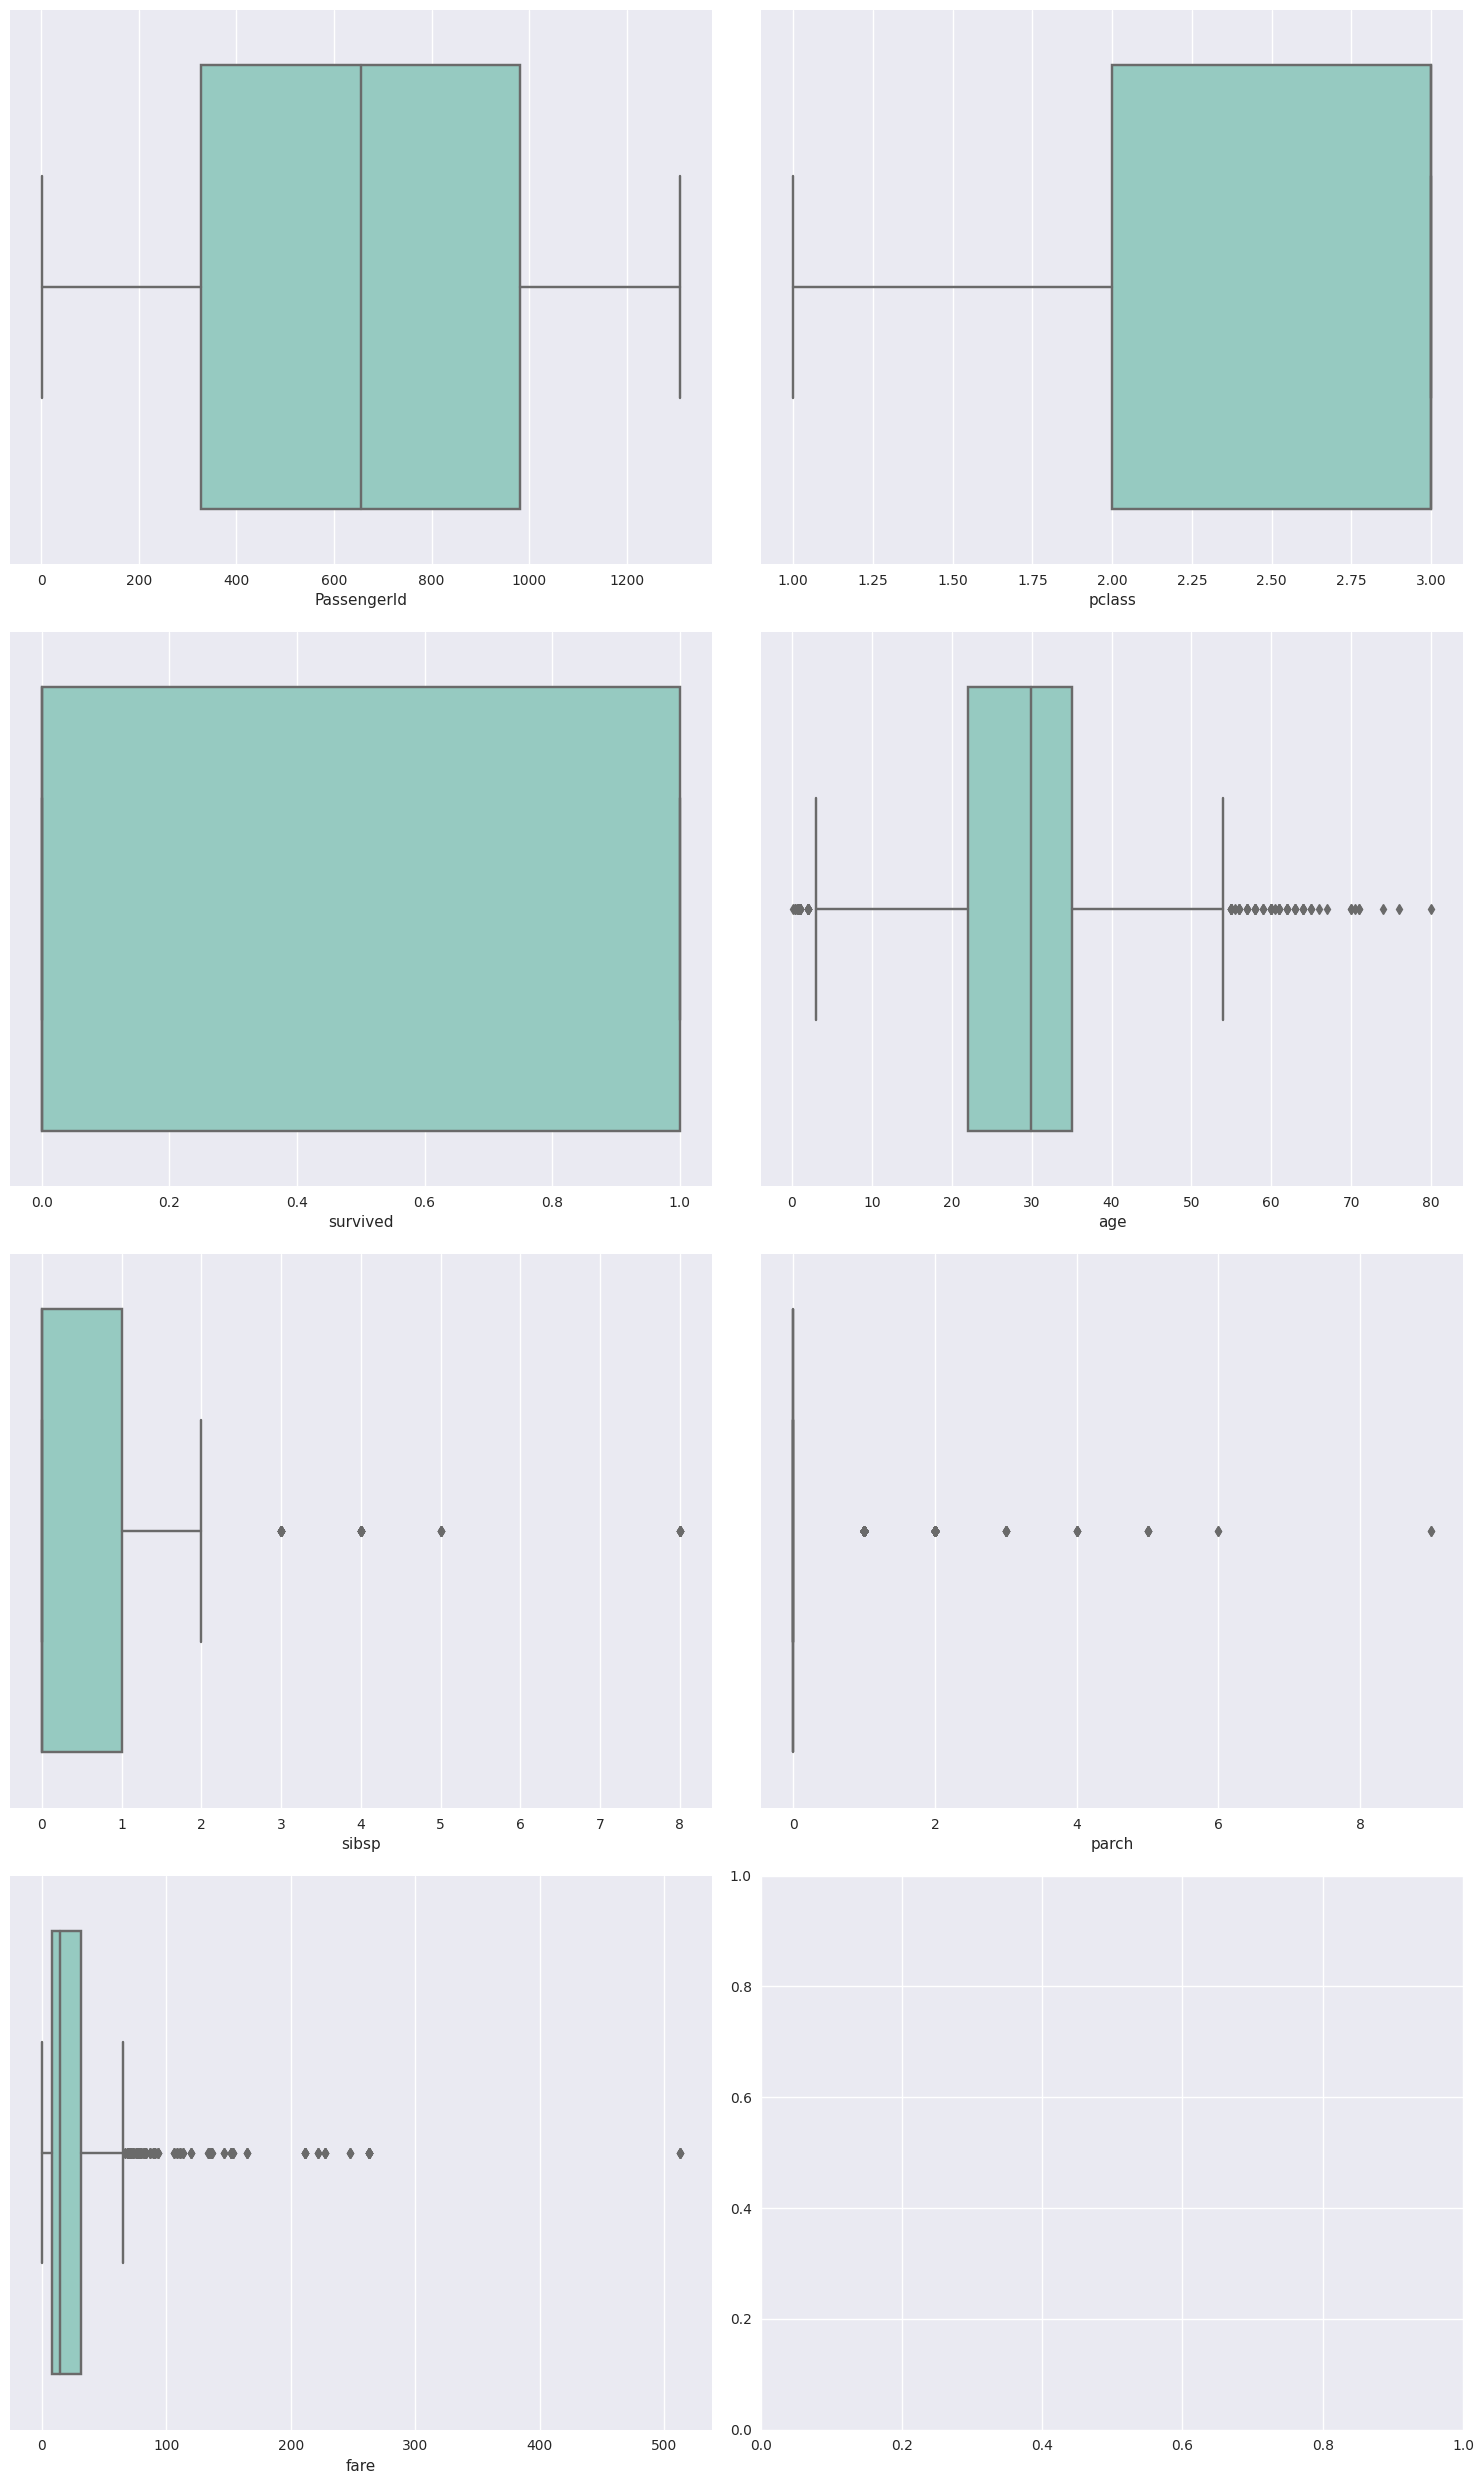

In [193]:
num_df = df.select_dtypes(include = 'number')
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=num_df[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()

# Data Reduction & Data Transformation

## LabelEncoding

***Perfom LabelEncoding on categorical features***

In [194]:
def labelencoder(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

In [195]:
df = labelencoder(df, columns=['name', 'embarked', 'ticket'])

In [196]:
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,1.0,21,female,29.0000,0.0,0.0,187,211.3375,2
1,2.0,1.0,1.0,23,male,0.9167,1.0,2.0,49,151.5500,2
2,3.0,1.0,0.0,24,female,2.0000,1.0,2.0,49,151.5500,2
3,4.0,1.0,0.0,25,male,30.0000,1.0,2.0,49,151.5500,2
4,5.0,1.0,0.0,26,female,25.0000,1.0,2.0,49,151.5500,2


## One-Hot Encoding

***Perfom One-Hot Encoding on `sex` Feature***

In [197]:
def one_hot(df, columns):
    return pd.get_dummies(df, columns=columns, dtype='int')

In [198]:
df = one_hot(df, ['sex'])
df.head()

,PassengerId,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,sex_female,sex_male
0,1.0,1.0,1.0,21,29.0000,0.0,0.0,187,211.3375,2,1,0
1,2.0,1.0,1.0,23,0.9167,1.0,2.0,49,151.5500,2,0,1
2,3.0,1.0,0.0,24,2.0000,1.0,2.0,49,151.5500,2,1,0
3,4.0,1.0,0.0,25,30.0000,1.0,2.0,49,151.5500,2,0,1
4,5.0,1.0,0.0,26,25.0000,1.0,2.0,49,151.5500,2,1,0


# Model Analysis

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
p_predict = model.predict(X_test)

print("The accuracy is", round(accuracy_score(p_predict, y_test) * 100,2))

The accuracy is 80.41


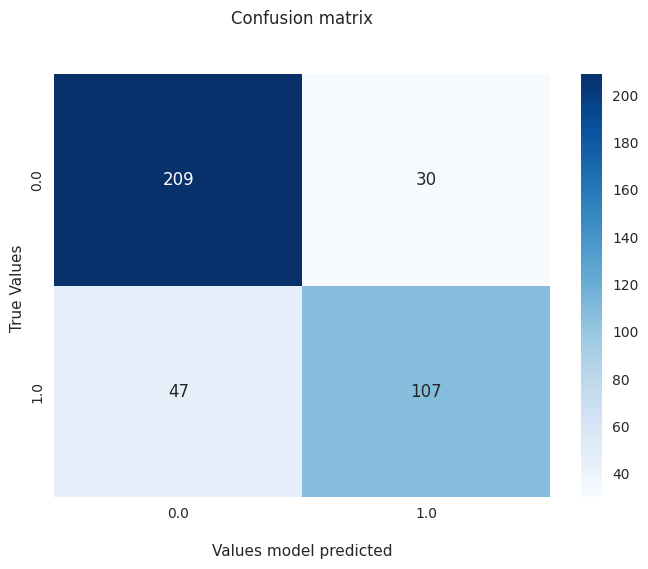

Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       239
         1.0       0.78      0.69      0.74       154

    accuracy                           0.80       393
   macro avg       0.80      0.78      0.79       393
weighted avg       0.80      0.80      0.80       393



In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

confusionMatrix = pd.crosstab(y_test, p_predict)
classificationReport = classification_report(y_test, p_predict)


fx = sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()
print(f"Classification Report\n{classificationReport}")